# Sources

In prose, objects detected in astronomical images are represented by `Source` objects. To encompass the large variety of sources encountered in astronomical images, prose fatures three kinds of sources:

- [PointSource](prose.core.source.PointSource): star
- [ExtendedSource](prose.core.source.ExtendedSource): comet, galaxy or lensed source
- [TraceSource](prose.core.source.TraceSource): diffracted spectrum, satellite streak or cosmic ray

To demonstrate how to use these objects, we will work on the following example image:

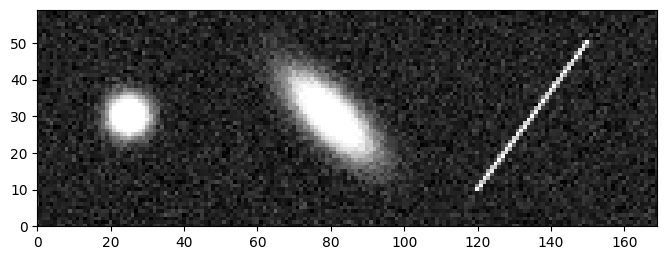

In [1]:
from prose.simulations import source_example

im = source_example()
_ = im.show()

## Detection

To detect these sources, detection blocks from the `prose.blocks.detection` module can be used:

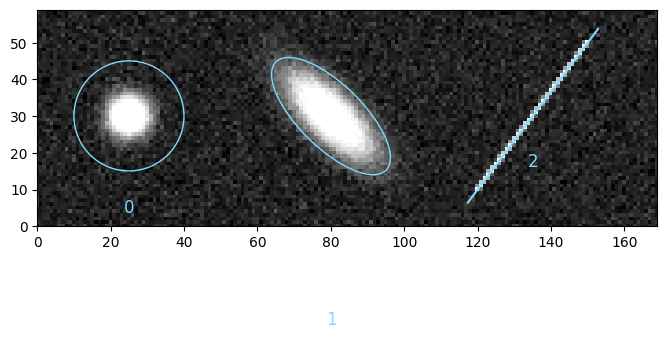

In [2]:
from prose import example_image, blocks

im = blocks.detection.AutoSourceDetection()(im)
_ = im.show()

```{note}
Source-specific detection blocks are also available, like the `PointSourceDetection`, as well as blocks with legacy detection algorithms such as `DAOFindStars`
```

From here, sources are located in the `Image.sources` object

In [3]:
im.sources

array([PointSource(a=7.5284497948229285, b=7.318646192782862, orientation=3.116343860746561, coords=array([24.96911805, 30.07629034]), peak=707.0269204218225, i=0, discarded=False),
       ExtendedSource(a=19.135990814538587, b=7.85950609156927, orientation=2.3657565976921955, coords=array([80.04382541, 30.0261606 ]), peak=606.4620707360549, i=1, discarded=False),
       TraceSource(a=29.597918529987332, b=0.9206485172052348, orientation=0.9273801139320101, coords=array([135.11113312,  30.13410395]), peak=514.483922136701, i=2, discarded=False)],
      dtype=object)

where we can identify the three types of sources, like an extended source at index 1

In [4]:
print(im.sources[1])

⬭ ExtendedSource 1
  ----------------
  coords   80.04   30.03
  a, b     19.14    7.86
  e         0.41


## Sources properties

Such sources contain useful properties and methods used throughout prose to perform image processing.

### Apertures

Apertures from the `photutils.aperture` module can easily be instantiated from a `Source` object

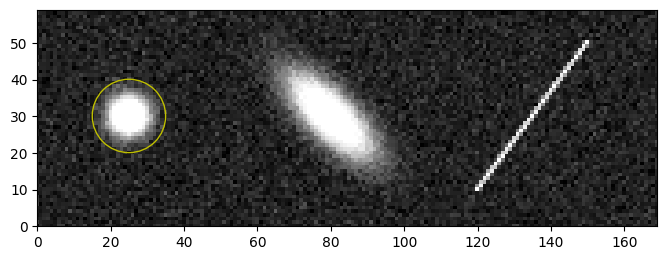

In [6]:
import matplotlib.pyplot as plt

source = im.sources[0]
aperture = source.circular_aperture(10, scale=False)

# plotted on top of the image
im.show(sources=False)
_ = aperture.plot(color="y")

For automatic treatments, the `Source.aperture` method provides an aperture specific to each type of source

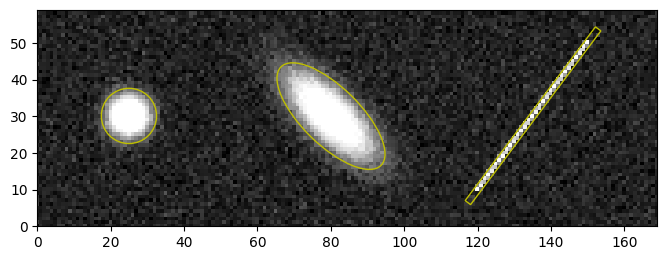

In [8]:
im.show(sources=False)

for source in im.sources:
    aperture = source.aperture()
    _ = aperture.plot(color="y")

and associated annulus methods

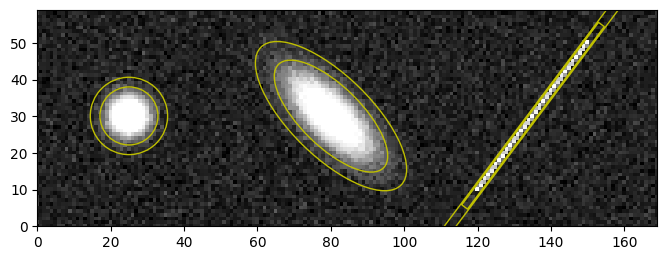

In [9]:
im.show(sources=False)

for source in im.sources:
    aperture = source.annulus()
    _ = aperture.plot(color="y")